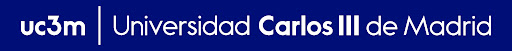
# Aprendizaje automático.
# Práctica 2. Predicción de abandono de empleados
Grupo 29
* Pablo Salcedo 100408773. 
* Jorge Sousa 100408805.



# 1. INTRODUCCIÓN

* El objetivo de esta práctica es analizar 30 parámetros y analizar su influencia en la decisión de un empleado sobre si dejará o no su trabajo.  
* La empresa quiere construir un modelo que analizando los datos de un trabajador sea capaz de clasificar en las dos clases de salida, es deicr, si dejará o no su trabajo.
* Trabajaremos con un problema de clasificación y estudiaremos distintos modelos para obtener el que mejor predicciones haga.

# 2. IMPORTS

In [ ]:
%matplotlib inline
#######
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import joblib


from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from scipy.stats import randint as sp_randint
from scipy.stats.distributions import chi2

import missingno as msno


import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE





# 3. LECTURA DE DATOS

In [ ]:
# Los datos los sacamos del fichero de datos correspondiente a cada grupo.
np.random.seed(29)
datos = joblib.load('attrition_available_29.pkl')

# 4. TRATAMIENTO DE DATOS

In [ ]:
np.random.seed(29)
X = datos.drop('Attrition', axis = 1)
y = datos.Attrition

X.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,3671.000000,3497.000000,4410.000000,3599.00000,3673.000000,3648.000000,3506.000000,3650.000000,3558.000000,4410.000000,...,3497.000000,4391.000000,3463.000000,3545.0,3495.000000,3569.000000,3502.000000,3671.000000,3652.000000,3622.000000
mean,7.321806,12.732056,2.729932,3.15421,2.730466,2.716009,2.770964,36.910959,9.125070,2.912925,...,65294.941378,2.694830,15.198094,8.0,0.789413,11.204259,2.798972,6.989921,2.148959,4.126726
std,1.334608,5.486095,0.711400,0.36120,1.094545,1.106080,0.706821,9.157135,8.060032,1.023933,...,47332.852095,2.498887,3.646501,0.0,0.851446,7.723684,1.280049,6.114365,3.177354,3.588424
min,5.416880,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.277314,8.000000,2.000000,3.00000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,29360.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,7.028778,13.000000,3.000000,3.00000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,...,49300.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.931481,17.000000,3.000000,3.00000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,83810.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,10.000000,2.000000,7.000000
max,10.937261,24.000000,4.000000,4.00000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


Dividimos el conjunto de datos entre entrada que será el conjunto X y la salida que será la variable 'Atrittion', será el conjunto y.

In [ ]:
X.head(15)

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,7.315971,13.0,2,NaN,3.0,2.0,4.0,31.0,NaN,Research & Development,...,0.0,Y,23.0,8.0,1.0,6.0,3.0,5.0,1.0,4.0
6,NaN,17.0,3,4.0,1.0,3.0,1.0,28.0,Travel_Rarely,NaN,...,2.0,Y,20.0,8.0,1.0,5.0,2.0,0.0,0.0,0.0
13,NaN,14.0,2,3.0,NaN,2.0,2.0,47.0,Non-Travel,Research & Development,...,1.0,Y,NaN,8.0,2.0,10.0,NaN,10.0,NaN,9.0
28,10.713066,NaN,2,3.0,4.0,NaN,1.0,44.0,Travel_Frequently,Research & Development,...,3.0,Y,14.0,8.0,1.0,19.0,2.0,1.0,0.0,NaN
30,9.662808,11.0,2,3.0,1.0,2.0,3.0,26.0,Travel_Rarely,Research & Development,...,2.0,Y,11.0,NaN,NaN,5.0,NaN,3.0,NaN,NaN
35,NaN,17.0,3,3.0,4.0,4.0,3.0,NaN,NaN,Research & Development,...,1.0,Y,12.0,8.0,2.0,8.0,5.0,NaN,7.0,4.0
38,6.177288,22.0,2,3.0,3.0,3.0,3.0,18.0,Travel_Rarely,Research & Development,...,1.0,Y,14.0,8.0,2.0,NaN,3.0,0.0,0.0,0.0
59,7.588037,NaN,3,3.0,3.0,NaN,2.0,52.0,Travel_Rarely,Research & Development,...,2.0,Y,18.0,8.0,1.0,11.0,2.0,8.0,7.0,7.0
65,10.641073,2.0,2,NaN,1.0,4.0,NaN,28.0,Travel_Rarely,Research & Development,...,5.0,NaN,14.0,8.0,1.0,NaN,4.0,3.0,2.0,2.0
69,9.851604,3.0,3,NaN,4.0,3.0,2.0,39.0,Travel_Rarely,NaN,...,4.0,Y,17.0,8.0,1.0,12.0,0.0,NaN,0.0,0.0


In [ ]:
y.head(15)

1      Yes
6      Yes
13     Yes
28     Yes
30     Yes
35     Yes
38     Yes
59     Yes
65     Yes
69     Yes
78     Yes
99     Yes
105    Yes
108    Yes
110    Yes
Name: Attrition, dtype: object

In [ ]:
y.value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

* Podemos ver con este análisis que hay 30 columnas, es decir 30 variables de entrada para determinar la salida y hay 4410 instancias, es decir 4410 trabajadores cuyos perfiles han sido estudiados para este experimento.
* De las cuales 3699 tienen un 'No' en la variable Atrittion, es decir no dejarían su trabajo y 711 si dejarían su trabajo.

# 5. ANÁLISIS EXPLORATORIO DE LOS DATOS

In [ ]:
X.columns.tolist()

['hrs',
 'absences',
 'JobInvolvement',
 'PerformanceRating',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'Age',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeID',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'Over18',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Vemos las variables de entrada del conjunto X, que serán las que determinen el valor de Atrittion.
- Variables de entrada:
  - **hrs**: El número de horas trabajadas por el empleado
  - **absences**: El número de ausencias tomadas por el empleado
  - **JobInvolvement**: El nivel de compromiso que tiene el empleado con su trabajo
  - **PerformanceRating**: La calificación del desempeño del empleado
  - **EnvironmentSatisfaction**: El nivel de satisfacción que tiene el empleado con su entorno de trabajo
  - **JobSatisfaction**: El nivel de satisfacción que tiene el empleado con su trabajo
  - **WorkLifeBalance**: El equilibrio entre el trabajo y la vida personal para el empleado
  - **Age**: La edad del empleado
  - **BusinessTravel**: La frecuencia de los viajes de negocios del empleado
  - **Department**: El departamento en el que trabaja el empleado
  - **DistanceFromHome**:La distancia entre el hogar del empleado y su lugar de trabajo
  - **Education**: El nivel más alto de educación alcanzado por el empleado
  - **EducationField**: La especialización del campo de estudio del empleado
  - **EmployeeCount**: El número de empleados en la empresa
  - **EmployeeID**: Un identificador único para cada empleado
  - **Gender**: El género del empleado
  - **JobLevel**: El nivel laboral del empleado en la jerarquía de la empresa
  - **JobRole**: El rol específico que el empleado tiene en su departamento
  - **MaritalStatus**: El estado civil del empleado
  - **MonthlyIncome**: El ingreso mensual del empleado
  - **NumCompaniesWorked**: El número de empresas para las que trabajó el empleado antes de unirse a la empresa actual
  - **Over18**: Si el empleado tiene más de 18 años (presumiblemente todos los empleados lo son)
  - **PercentSalaryHike**: El porcentaje de aumento salarial que recibió el empleado en su último aumento de salario
  - **StandardHours**: El número estándar de horas de trabajo en la empresa
  - **StockOptionLevel**: El nivel de opción de acciones que tiene el empleado
  - **TotalWorkingYears**: El número total de años que el empleado ha trabajado
  - **TrainingTimesLastYear**: El número de veces que el empleado recibió capacitación en el último año
  - **YearsAtCompany**: El número de años que el empleado ha estado en la empresa
  - **YearsSinceLastPromotion**: El número de años desde la última promoción del empleado
  - **YearsWithCurrManager**: El número de años que el empleado ha estado con su actual gerente

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      3671 non-null   float64
 1   absences                 3497 non-null   float64
 2   JobInvolvement           4410 non-null   int64  
 3   PerformanceRating        3599 non-null   float64
 4   EnvironmentSatisfaction  3673 non-null   float64
 5   JobSatisfaction          3648 non-null   float64
 6   WorkLifeBalance          3506 non-null   float64
 7   Age                      3650 non-null   float64
 8   BusinessTravel           3547 non-null   object 
 9   Department               3678 non-null   object 
 10  DistanceFromHome         3558 non-null   float64
 11  Education                4410 non-null   int64  
 12  EducationField           3561 non-null   object 
 13  EmployeeCount            3476 non-null   float64
 14  EmployeeID              

Vemos que hay variables numéricas y otras categóricas que son los object.

## 5.1 Análisis de valores nulos

In [ ]:
X.isnull().any()

hrs                         True
absences                    True
JobInvolvement             False
PerformanceRating           True
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
Age                         True
BusinessTravel              True
Department                  True
DistanceFromHome            True
Education                  False
EducationField              True
EmployeeCount               True
EmployeeID                  True
Gender                      True
JobLevel                    True
JobRole                     True
MaritalStatus              False
MonthlyIncome               True
NumCompaniesWorked          True
Over18                      True
PercentSalaryHike           True
StandardHours               True
StockOptionLevel            True
TotalWorkingYears           True
TrainingTimesLastYear       True
YearsAtCompany              True
YearsSinceLastPromotion     True
YearsWithCurrManager        True
dtype: boo

Aquí analizamos si alguna de las variables de entrada tiene valores nulos. 
Vemos que la mayoría si tienen valores nulos, solamente tres no tienen ninguno.

In [ ]:
X.isnull().sum()

hrs                        739
absences                   913
JobInvolvement               0
PerformanceRating          811
EnvironmentSatisfaction    737
JobSatisfaction            762
WorkLifeBalance            904
Age                        760
BusinessTravel             863
Department                 732
DistanceFromHome           852
Education                    0
EducationField             849
EmployeeCount              934
EmployeeID                 774
Gender                     713
JobLevel                   779
JobRole                    704
MaritalStatus                0
MonthlyIncome              913
NumCompaniesWorked          19
Over18                     865
PercentSalaryHike          947
StandardHours              865
StockOptionLevel           915
TotalWorkingYears          841
TrainingTimesLastYear      908
YearsAtCompany             739
YearsSinceLastPromotion    758
YearsWithCurrManager       788
dtype: int64

En esta sección vemos el número de valores nulos de cada variable, como hemos visto antes solamente 3 no tienen valores nulo, aunque hay otra variable que tiene solo 19 mientras que el resto tiene mas de 700.
Ahora pueden parecer mcuhospero habrá que ver el porcentaje de valores nulos para poder tomar una decisión.

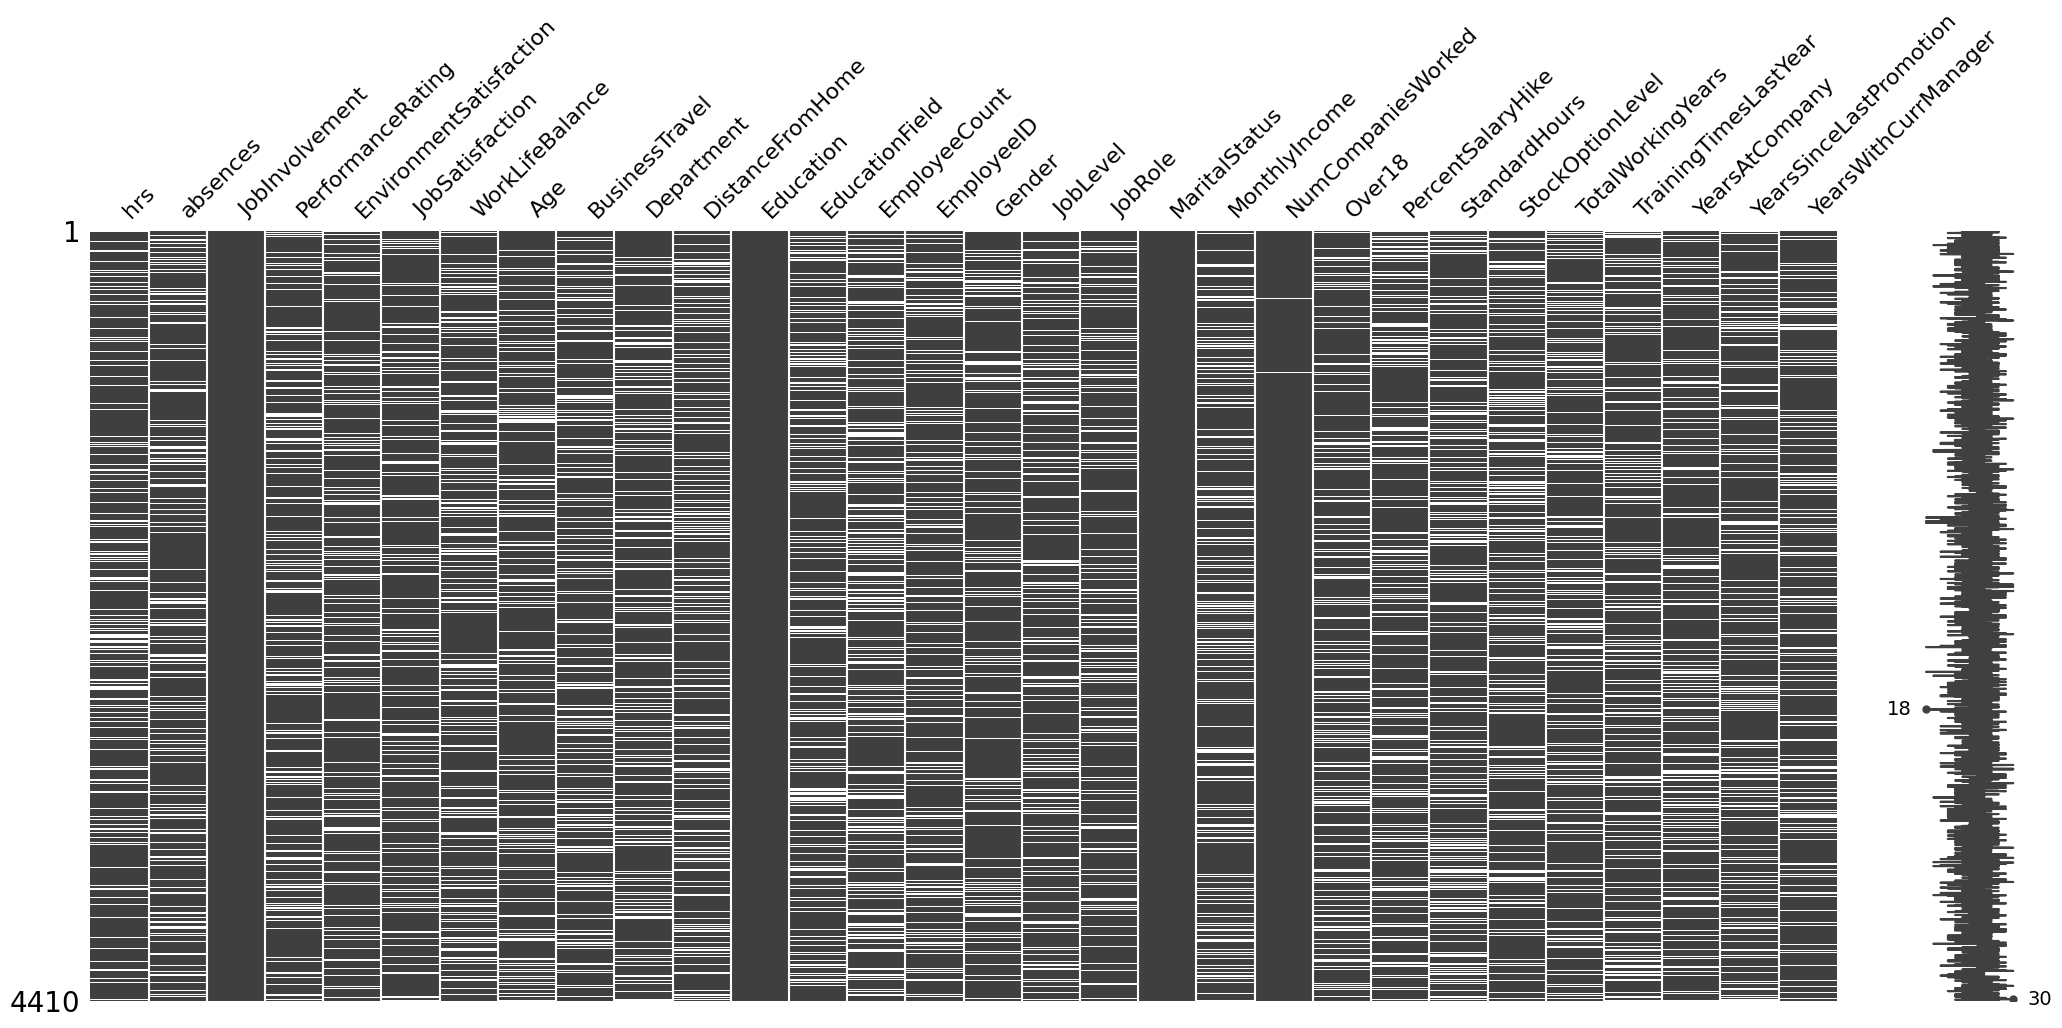

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(X)
plt.show()

En esta parte vemos lo mismo que antes pero de forma gráfica, los valores nulos se representan mediante las líneas blancas, como podemos ver en las variables que no tienen valores nulos no se ve ninguna línea y en el resto se observan muchas líneas blancas.

In [ ]:
X.isnull().sum() / len(X) * 100

hrs                        16.757370
absences                   20.702948
JobInvolvement              0.000000
PerformanceRating          18.390023
EnvironmentSatisfaction    16.712018
JobSatisfaction            17.278912
WorkLifeBalance            20.498866
Age                        17.233560
BusinessTravel             19.569161
Department                 16.598639
DistanceFromHome           19.319728
Education                   0.000000
EducationField             19.251701
EmployeeCount              21.179138
EmployeeID                 17.551020
Gender                     16.167800
JobLevel                   17.664399
JobRole                    15.963719
MaritalStatus               0.000000
MonthlyIncome              20.702948
NumCompaniesWorked          0.430839
Over18                     19.614512
PercentSalaryHike          21.473923
StandardHours              19.614512
StockOptionLevel           20.748299
TotalWorkingYears          19.070295
TrainingTimesLastYear      20.589569
Y

Ahora analizamos el porcentaje de valores nulos, podemos ver que ninguno llega al 25% de valores nulos, que es el umbral a partir del cual creemos que empezaría afectar negativamente, por lo que no vamos a eliminar ninguna variable de momento.

## 5.2 Matriz de correlación

In [ ]:
#Modificamos en la variable de salida, las variables Si y No por 1 y 0 respectivamente
corr_y = y.replace({'Yes':1, 'No':0})
corr_y.value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

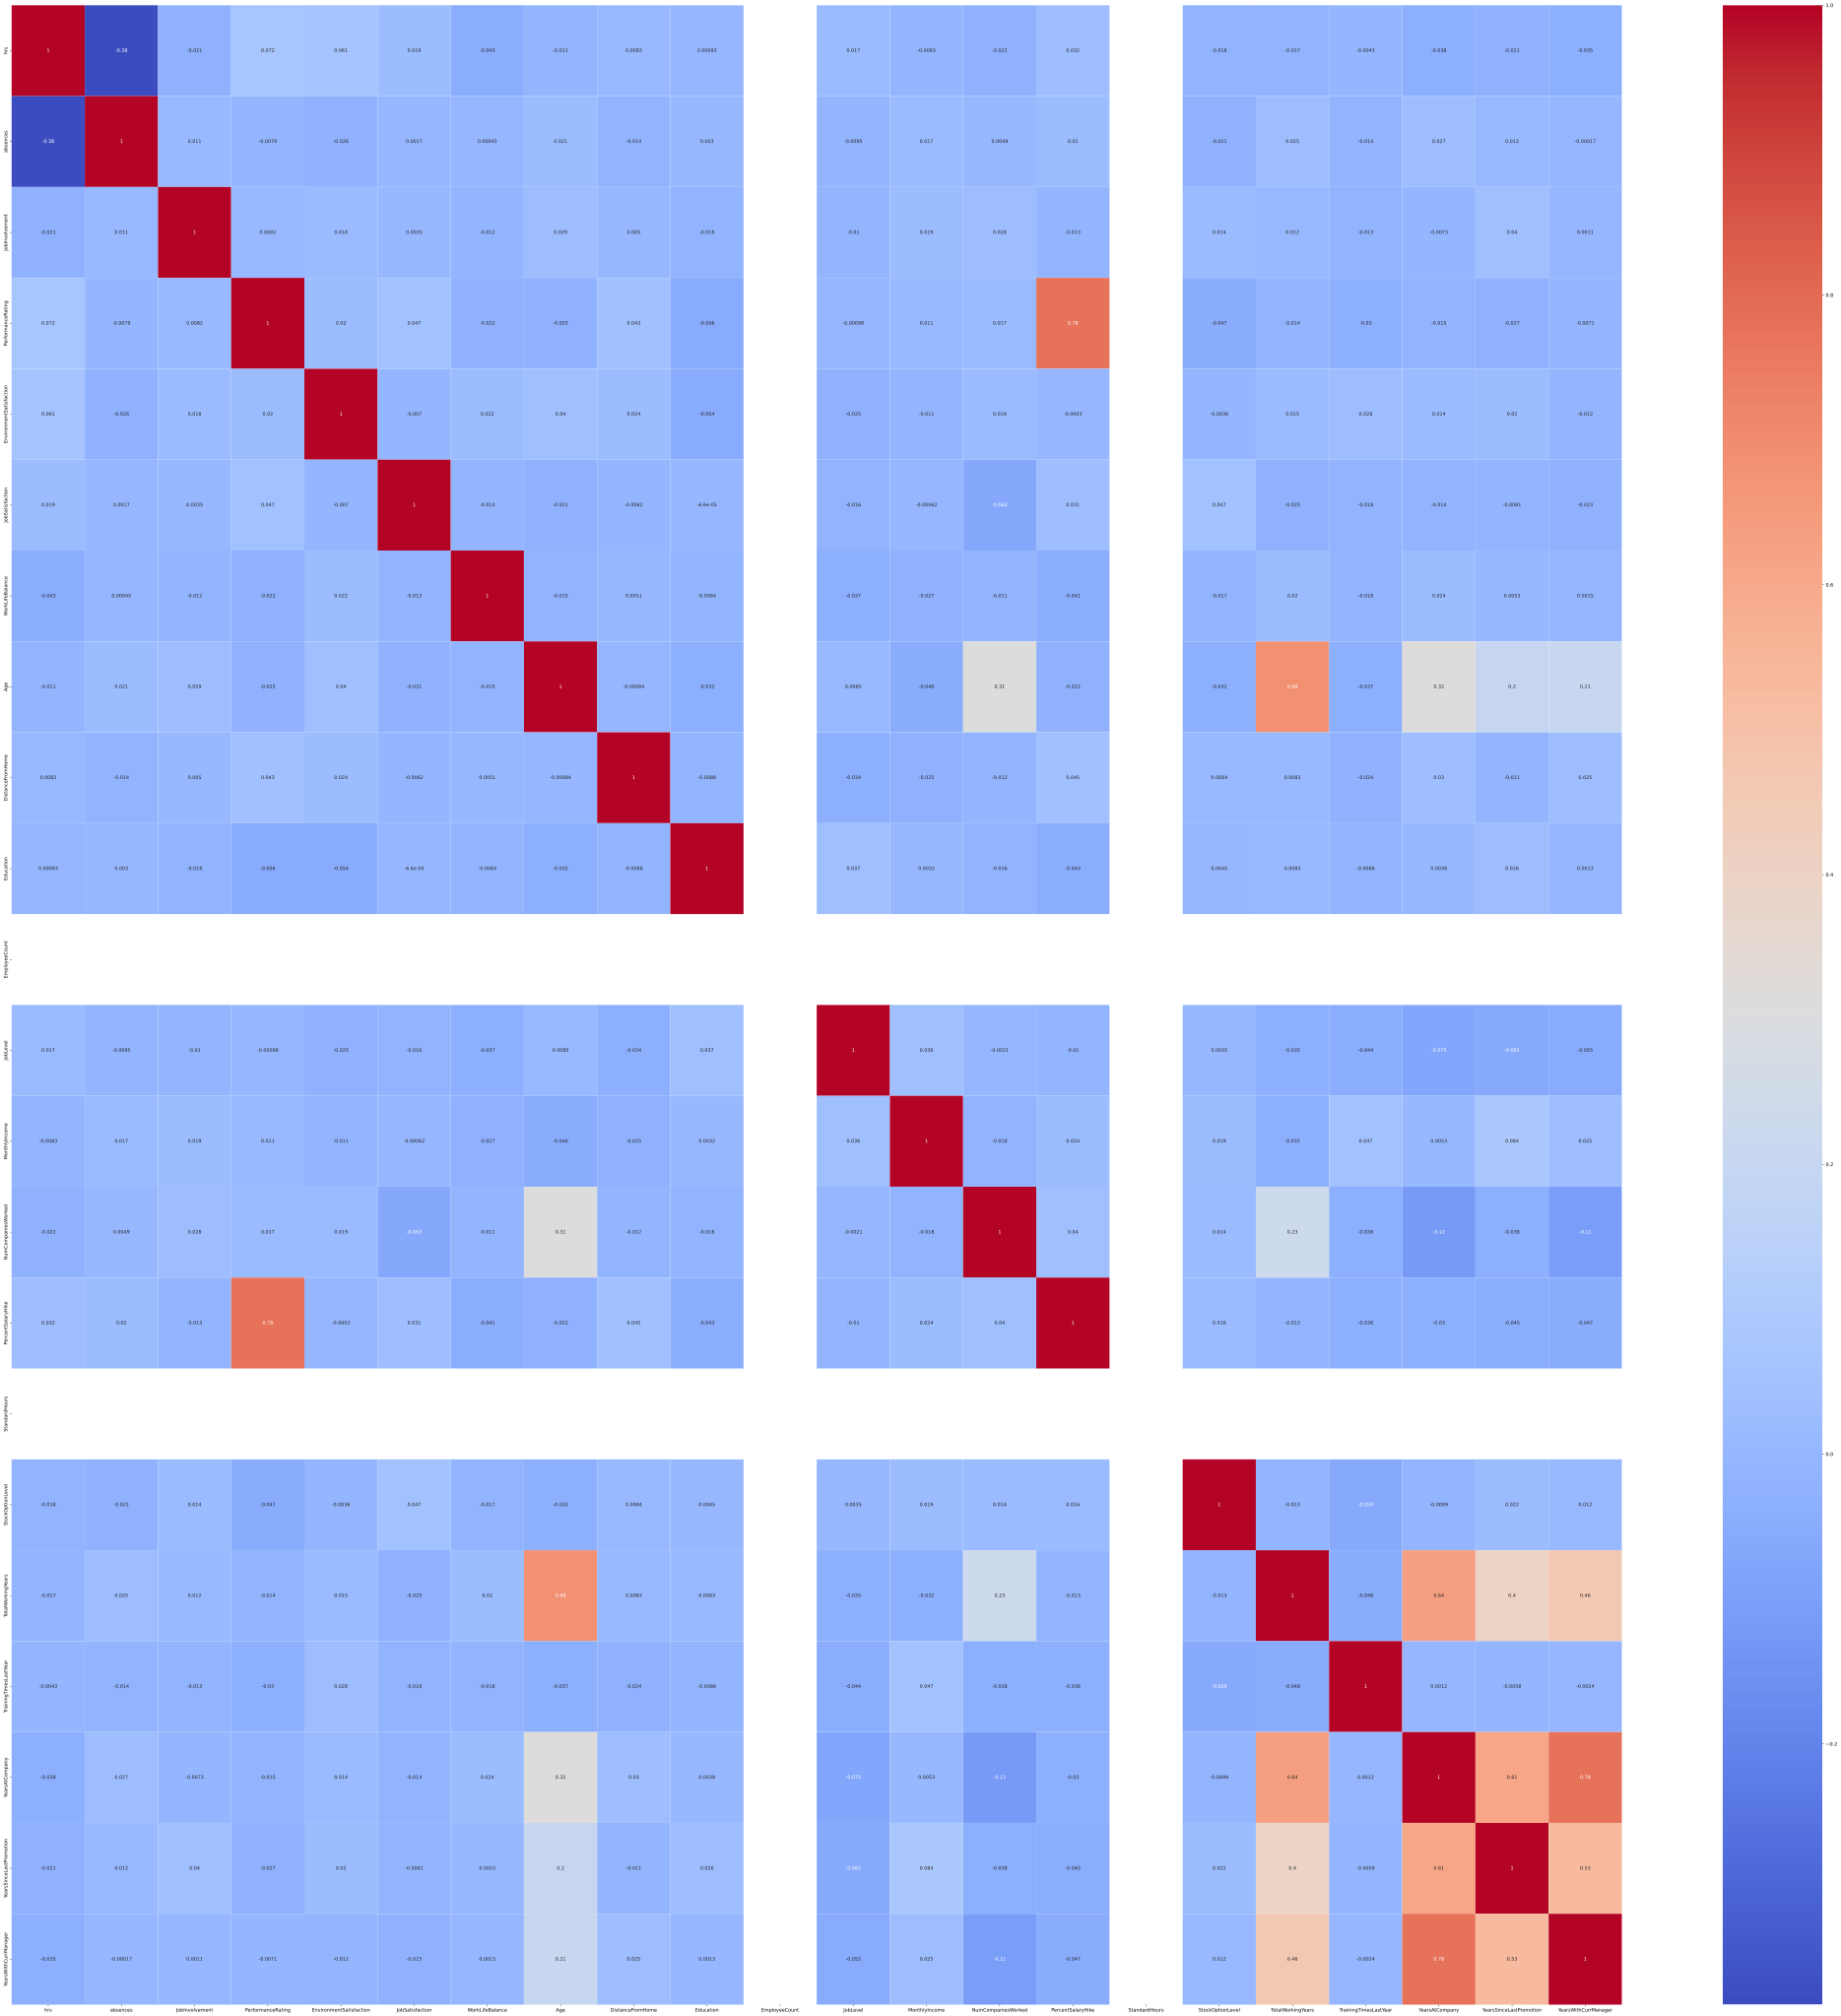

In [ ]:
%config InlineBackend.figure_format = 'svg'

X_comb = pd.concat([X, corr_y.astype(float)], axis=1)
plt.figure(figsize=(76,76))
sns.heatmap(X_comb[['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department','DistanceFromHome', 'Education', 'EducationField','EmployeeCount', 'Gender', 'JobLevel','JobRole', 'MaritalStatus', 'MonthlyIncome','NumCompaniesWorked', 'Over18', 'PercentSalaryHike','StandardHours', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager']].corr(),
                annot=True, 
                cmap = "coolwarm")
plt.show()

* Vamos a analizar la correlación entre las variables numéricas.
* Cuanto más oscuro sea el color, más cercano a los extremos, 1 y -1. 
* Cuanto más positiva sea la correlación, más rojo será el color.
* Debido al alto número de variables, no podemos extraer conclusiones muy claras.


## 5.3 Análisis del balanceo de clases

Vamos a analizar el balanceo en la clase de salida, Atrittion

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


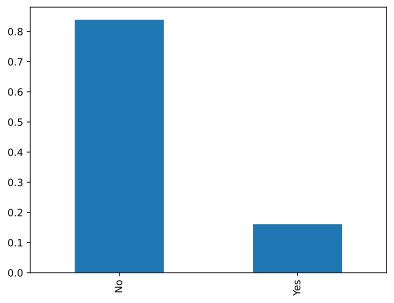

In [ ]:
# Calcular la proporción de la variable objetivo
proporcion_si_no = datos['Attrition'].value_counts(normalize=True)
print(proporcion_si_no)

# Visualizar los datos
proporcion_si_no.plot(kind='bar')
plt.show()

* Vamos a analizar el balanceo de la salida.
* Vemos la proporción en la variable Atrittion de 'Si' y 'No' sobre si dejarían su trabajo. Vemos una clara ventaja del 'No'.

In [ ]:
#Borramos EmployeeID porque creemos que no tiene influencia en si una persona deja o no su trabajo
X.drop(['EmployeeID'], axis=1, inplace=True)

In [ ]:
cat_cols_1 = X.select_dtypes(include="object").columns
num_cols_1 = X.select_dtypes(exclude="object").columns
cat_cols_1

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')

A continuación vamos a analizar el balanceo en las variables categóricas

In [ ]:
X.BusinessTravel.value_counts()

Travel_Rarely        2515
Travel_Frequently     668
Non-Travel            364
Name: BusinessTravel, dtype: int64

In [ ]:
X.Department.value_counts()

Research & Development    2412
Sales                     1117
Human Resources            149
Name: Department, dtype: int64

In [ ]:
X.EducationField.value_counts()

Life Sciences       1461
Medical             1123
Marketing            382
Technical Degree     324
Other                205
Human Resources       66
Name: EducationField, dtype: int64

In [ ]:
X.Gender.value_counts()

Male      2227
Female    1470
Name: Gender, dtype: int64

In [ ]:
X.JobRole.value_counts()

Sales Executive              821
Research Scientist           742
Laboratory Technician        648
Manufacturing Director       362
Healthcare Representative    337
Manager                      263
Sales Representative         214
Research Director            193
Human Resources              126
Name: JobRole, dtype: int64

In [ ]:
X.MaritalStatus.value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [ ]:
X.Over18.value_counts()

Y    3545
Name: Over18, dtype: int64

Analizando las clases de variables categóricas vemos que en todas salvo en la de JobRole, se ve que una de las clases es dominante y tiene un número superior de insntancias.
Pero no es un desblanceo muy grande que afecte gravemente a los datos, por lo que no debemos realizar ningún preprocesamiento más.

# 6. División del conjunto y tratamiento de datos

Con el LabelEncoder, vamos a codificar las variables de salida y modificarlas a valores numéricos.

In [ ]:
np.random.seed(29)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

le = preprocessing.LabelEncoder()
le.fit(y)

y_test = le.transform(y_test)
y_train = le.transform (y_train)
print("Salidas codificadas: ", y_test[:15])
print("---------------------------------------------------------------------")
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

print("Variables categóricas: ", cat_cols)
print("---------------------------------------------------------------------")

print("Variables numéricas: ", num_cols)
print("---------------------------------------------------------------------")

Salidas codificadas:  [0 0 0 1 0 0 0 0 0 0 1 0 0 1 0]
---------------------------------------------------------------------
Variables categóricas:  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')
---------------------------------------------------------------------
Variables numéricas:  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
---------------------------------------------------------------------


Ahora vamos a relaizar varias transformaciones a los datos: 
* Para las variables categóricas:
  * Simple imputer: Reemplaza los valores que faltan por un estadístico descriptivo, en este caso será el valor más frecuente de esa columna.
  * OneHotEncoder: Convierte variables categóricas en un array numérico.
  * PCA: Reducción de dimensionalidad.

In [ ]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)), 
    ('pca', PCA(n_components=5)) 
])
cat_transformer[0]

SimpleImputer(strategy='most_frequent')

* Para las variables numéricas:
  * KNNImputer: Reemplaza los valores faltantes usando el algoritmo de KNN. en este caso usará los 5 vecinos más cercanos.
  * RobustScaler: Elimina ka mediana y escala los datos según el rango de cuartiles.


In [ ]:
num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

A continuación vamos a definir el preprocesador de las transformaciones anteriores.

In [ ]:
np.random.seed(29)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_cols),
        ('num', num_transformer, num_cols)
        
    ])
       

preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('pca', PCA(n_components=5))]),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')),
                                ('num',
                                 Pipeline(steps=[('im...
                                 Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object'))])

# 6. MÉTODOS BÁSICOS

## 6.1 LogisticRegression (Modelo base)

* Se implementa una regresión logística regularizada usando las librerías 'liblinear', 'lbfgs', 'sag', 'saga' o 'newton-cg'.
Los parámetros más importantes son:
  - penalty: Especifica si hay regularización y el tipo en caso de que haya. Hay varios tipos: 'l1', 'l2', que es la opción por defecto, 'elasticnet' y 'None' para que no haya. En nuestro caso no hay.
  - class_weight: Ajusta los pesos de las variables. En nuestro caso será balanceado.
  - random_state: La semilla.

### 6.1.1 Construcción del clasificador

Creamos un pipeline para unir las transformaciones anteriores con el Logistic Regression y crear el clasificador correspondiente.

In [ ]:
scaler = StandardScaler()


clf_logistic = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(penalty='none', class_weight='balanced', random_state = 29))
                         ])
clf_logistic

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='objec...
       'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', penalty='none',
                                    random_state=29))])

### 6.1.2 Construcción del modelo

In [ ]:
scores_1 = cross_val_score(clf_logistic, X_train, y_train, scoring='balanced_accuracy', cv = 5)
print(f"All the accuracies are: {scores_1}")
print(f"And the average crossvalidation accuracy is: {scores_1.mean():.2f} +- {scores_1.std():.2f}")

All the accuracies are: [0.67893551 0.71200806 0.67503853 0.70911564 0.70081931]
And the average crossvalidation accuracy is: 0.70 +- 0.02


In [ ]:
num_transformer_logistic = {'preprocessor__num__imputer__n_neighbors': list(range(2, 15)), 
                        'preprocessor__num__imputer__add_indicator': [True, False]}

cat_transformer_logistic = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__imputer__add_indicator': [True, False],
                        'preprocessor__cat__pca__n_components': list(range(2, 7))}

logistic_regression_logistic = {'classifier__penalty': ['l1', 'l2', 'elascticnet','none'],
                            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                            'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

param_dist = {**num_transformer_logistic, **cat_transformer_logistic, **logistic_regression_logistic} 

logistic_regression = RandomizedSearchCV(clf_logistic,
                                     param_distributions = param_dist,
                                     random_state = 29,
                                     scoring ='balanced_accuracy',
                                     cv = 5,
                                     refit = True,
                                     n_jobs = -1,
                                     verbose = 1,
                                     n_iter = 150,
                                     return_train_score = True)


logistic_regression.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False)),
                                                                                               ('pca',
                                                                                                PCA(n_components=5))]),
                                                                               Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'Mar...
                                        'preprocessor__cat__imputer__add_indicator': [True,
                                                                                      False],
                                        'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                                 'constant'],
                                        'preprocessor__cat__pca__n_components': [2,
                                                                                 3,
                                                                                 4,
                                                                                 5,
                                                                                 6],
                                        'preprocessor__num__imputer__add_indicator': [True,
                                                                                      False],
                                        'preprocessor__num__imputer__n_neighbors': [2,
                                                                                    3,
                                                                                    4,
                                                                                    5,
                                                                                    6,
                                                                                    7,
                                                                                    8,
                                                                                    9,
                                                                                    10,
                                                                                    11,
                                                                                    12,
                                                                                    13,
                                                                                    14]},
                   random_state=29, return_train_score=True,
                   scoring='balanced_accuracy', verbose=1)

In [ ]:
logistic_regression.best_score_

0.7028028125061171

In [ ]:
logistic_regression.best_params_

{'preprocessor__num__imputer__n_neighbors': 6,
 'preprocessor__num__imputer__add_indicator': False,
 'preprocessor__cat__pca__n_components': 5,
 'preprocessor__cat__imputer__strategy': 'most_frequent',
 'preprocessor__cat__imputer__add_indicator': True,
 'classifier__solver': 'newton-cg',
 'classifier__penalty': 'l2',
 'classifier__C': 0.01}

In [ ]:
y_pred_logistic = logistic_regression.predict(X_test)
print(y_pred_logistic[:15])


print(classification_report(y_test, y_pred_logistic))

[1 0 1 0 0 0 1 1 0 1 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       740
           1       0.31      0.76      0.44       142

    accuracy                           0.69       882
   macro avg       0.62      0.72      0.61       882
weighted avg       0.84      0.69      0.73       882



Aquí podemos ver el Classification Report, donde vemos que solamente clasifica correctamente el 69% de las predicciones. A pesar de tener un acierto para clasficar la clase 1 con un 94%, la clase 2 solamente tiene un 31% de acierto.

In [ ]:
print(f"El valor de balanced accuracy: {balanced_accuracy_score(y_test, y_pred_logistic)}")

El valor de balanced accuracy: 0.7194708793300342


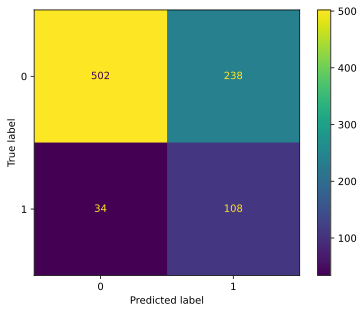

In [ ]:
cm = confusion_matrix(y_test, y_pred_logistic, labels=logistic_regression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression.classes_)
disp.plot()
plt.show()

Aqui podemos contrastar los resultados del informe anterior. De los 346 que ha predicho de la clase 1, solamente 108 son verdaremente de la clase 1.

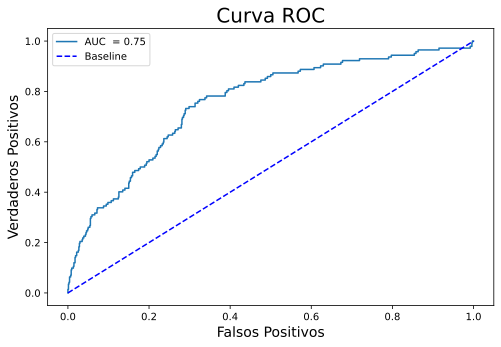

In [ ]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = logistic_regression.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

A continuación vamos a analizar la curva ROC, podemos ver que empiezan a aparecer falsos positivos muy pronto, prácticamente cuando solamente hay un 10% de verdaderos positivos ya se empiezan a ver falsos positivos.

## 6.2 Histogram Gradient Boosting Classifier

El primer método de boosting y perteneciente a la librería scikit-learn es Histogram Gradient Boosting.
* Es una implementación del Gradient Boosting pero basándose en histogramas, lo que permite manejar mayor cantidad de datos y ser más rápido.

### 6.2.1 Construcción del clasificador 

Creamos un pipeline para unir las transformaciones de las variables categóricas y numéricas con el HistGradientBoosting y crear el clasificador correspondiente.

In [ ]:
clf_gradient_boosting = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', HistGradientBoostingClassifier(class_weight='balanced', random_state = 29))
                                      ])
clf_gradient_boosting

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='objec...
       'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                random_state=29))])

In [ ]:
scores_gradient_boosting = cross_val_score(clf_gradient_boosting, X_train, y_train, scoring='balanced_accuracy', cv = 5)
print(f"All the accuracies are: {scores_gradient_boosting}")
print(f"And the average crossvalidation accuracy is: {scores_gradient_boosting.mean():.2f} +- {scores_gradient_boosting.std():.2f}")

All the accuracies are: [0.79737138 0.81390766 0.84646159 0.80273858 0.82941491]
And the average crossvalidation accuracy is: 0.82 +- 0.02


### 6.2.2 Construcción del modelo 

In [ ]:
num_transformer_gradient_boosting = {'preprocessor__num__imputer__n_neighbors': list(range(2, 15)), 
                        'preprocessor__num__imputer__add_indicator': [True, False]}

cat_transformer_gradient_boosting = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__imputer__add_indicator': [True, False],
                        'preprocessor__cat__pca__n_components': list(range(2, 7))}

boost_classifier_gradient_boosting = {'classifier__learning_rate': [0.0001,0.001, 0.01, 0.05, 0.1, 0.25, 0.5],
                         'classifier__max_depth': [None, 1, 3, 5, 10, 20, 30],
                         'classifier__max_leaf_nodes': [5, 10, 30, 50, 75, 100],
                         'classifier__l2_regularization': [0, 1]
                        }

params_gradient_boosting = {**num_transformer_gradient_boosting, **cat_transformer_gradient_boosting, **boost_classifier_gradient_boosting} 

gradient_boosting_regression = RandomizedSearchCV(clf_gradient_boosting,
                                     param_distributions = params_gradient_boosting,
                                     random_state = 29,
                                     scoring ='balanced_accuracy',
                                     cv = 5,
                                     refit = True,
                                     n_jobs = -1,
                                     verbose = 1,
                                     n_iter = 150,
                                     return_train_score = True)

gradient_boosting_regression.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False)),
                                                                                               ('pca',
                                                                                                PCA(n_components=5))]),
                                                                               Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'Mar...
                                        'preprocessor__cat__imputer__add_indicator': [True,
                                                                                      False],
                                        'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                                 'constant'],
                                        'preprocessor__cat__pca__n_components': [2,
                                                                                 3,
                                                                                 4,
                                                                                 5,
                                                                                 6],
                                        'preprocessor__num__imputer__add_indicator': [True,
                                                                                      False],
                                        'preprocessor__num__imputer__n_neighbors': [2,
                                                                                    3,
                                                                                    4,
                                                                                    5,
                                                                                    6,
                                                                                    7,
                                                                                    8,
                                                                                    9,
                                                                                    10,
                                                                                    11,
                                                                                    12,
                                                                                    13,
                                                                                    14]},
                   random_state=29, return_train_score=True,
                   scoring='balanced_accuracy', verbose=1)

In [ ]:
gradient_boosting_regression.best_score_

0.8355036572933432

In [ ]:
gradient_boosting_regression.best_params_

{'preprocessor__num__imputer__n_neighbors': 2,
 'preprocessor__num__imputer__add_indicator': False,
 'preprocessor__cat__pca__n_components': 6,
 'preprocessor__cat__imputer__strategy': 'most_frequent',
 'preprocessor__cat__imputer__add_indicator': False,
 'classifier__max_leaf_nodes': 30,
 'classifier__max_depth': 10,
 'classifier__learning_rate': 0.25,
 'classifier__l2_regularization': 1}

In [ ]:
y_pred_gradient_boosting = gradient_boosting_regression.predict(X_test)
print(y_pred_gradient_boosting[:15])


print(classification_report(y_test, y_pred_gradient_boosting))

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       740
           1       0.90      0.78      0.84       142

    accuracy                           0.95       882
   macro avg       0.93      0.88      0.90       882
weighted avg       0.95      0.95      0.95       882



Aquí podemos ver el Classification Report, donde vemos que se clasifica correctamente el 95% de las predicciones, bastante mejor que el 69% del logistic regression. Al igual que en el anterior modelo, vuelve a tener un menor acierto la clase 1, es decir, le cuesta más predecir correctamente que instancias son de la clase 1.

In [ ]:

print(f"El valor de balanced accuracy: {balanced_accuracy_score(y_test, y_pred_gradient_boosting)}")

El valor de balanced accuracy: 0.8827369623144271


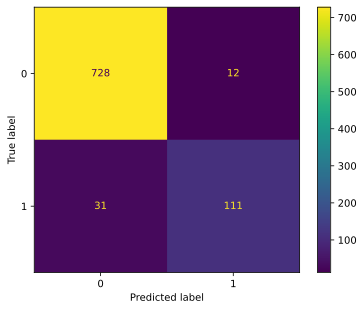

In [ ]:
cm = confusion_matrix(y_test, y_pred_gradient_boosting, labels=gradient_boosting_regression.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gradient_boosting_regression.classes_)
disp.plot()
plt.show()

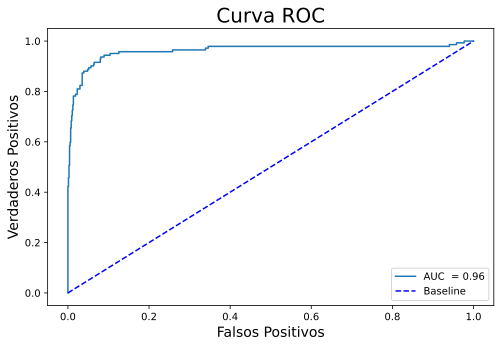

In [ ]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = gradient_boosting_regression.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

Analizando esta curva de ROC, se puede observar una gran diferencia con respecto al anterior modelo, ya que aquí hasta el 40% de los verdaderos positivos no aparecen los primeros falsos positivos, por lo tanto al final se confirma la mejora de este modelo con respecto al logistic regression.

## 6.3 Boosting XGB

El primer método de boosting, de una librería externa es XGBoosting.
* Es un algoritmo de boosting, que emplea árboles de decisión para mejorar la regularización y reducir el sobreaprendizaje.
  - El parámetro que se usa en nuestro caso es el de scale_pos_weight, que es el balanceo entre clases positivas y negativas. Para nosotros es cn la variable Atrittion, 'No' será la clase positiva, es decir no deja su trabajo y la negativa será cuando si deja su trabajo.

### 6.3.1 Construcción del clasificador 

Creamos un pipeline para unir las transformaciones de las variables categóricas y numéricas con el XGBoost y crear el clasificador correspondiente.

In [ ]:
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', XGBClassifier(scale_pos_weight=2959/568, random_state = 29))
]) 
clf_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='objec...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=29, ...))])

In [ ]:
scores_xgb = cross_val_score(clf_xgb, X_train, y_train, scoring='balanced_accuracy', cv = 5)
print(f"Todos los balanced_accuracy son:: {scores_xgb}") 
print(f"Y el promedio de la accuracy de validación cruzada es: {scores_xgb.mean():.2f} +- {scores_xgb.std():.2f}")

Todos los balanced_accuracy son:: [0.8102033  0.7970454  0.84360183 0.82425706 0.84241696]
Y el promedio de la accuracy de validación cruzada es: 0.82 +- 0.02


### 6.3.2 Construcción del modelo 

In [ ]:
num_transformer_xgb = {'preprocessor__num__imputer__n_neighbors': list(range(2, 12)), 
                        'preprocessor__num__imputer__add_indicator': [True, False]}

cat_transformer_xgb = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__imputer__add_indicator': [True, False],
                        'preprocessor__cat__pca__n_components': list(range(1, 6))}

boost_classifier_xgb = {'classifier__learning_rate': [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'classifier__n_estimator': sp_randint(50, 500),
                         'classifier__l2_regularization' : sp_randint(0,10),
                         'classifier__subsample': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                        }

params_xgboost = {**num_transformer_xgb, **cat_transformer_xgb, **boost_classifier_xgb} 

xgb_regression = RandomizedSearchCV(clf_xgb,
                                     param_distributions = params_xgboost,
                                     random_state = 29,
                                     scoring ='balanced_accuracy',
                                     cv = 5,
                                     refit = True,
                                     n_jobs = -1,
                                     verbose = 1,
                                     n_iter = 150,
                                     return_train_score = True)

xgb_regression.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[16:54:28] WARNING: ../src/learner.cc:767: 
Parameters: { "l2_regularization", "n_estimator" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False)),
                                                                                               ('pca',
                                                                                                PCA(n_components=5))]),
                                                                               Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'Mar...
                                        'preprocessor__cat__imputer__add_indicator': [True,
                                                                                      False],
                                        'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                                 'constant'],
                                        'preprocessor__cat__pca__n_components': [1,
                                                                                 2,
                                                                                 3,
                                                                                 4,
                                                                                 5],
                                        'preprocessor__num__imputer__add_indicator': [True,
                                                                                      False],
                                        'preprocessor__num__imputer__n_neighbors': [2,
                                                                                    3,
                                                                                    4,
                                                                                    5,
                                                                                    6,
                                                                                    7,
                                                                                    8,
                                                                                    9,
                                                                                    10,
                                                                                    11]},
                   random_state=29, return_train_score=True,
                   scoring='balanced_accuracy', verbose=1)

In [ ]:
xgb_regression.best_score_

0.8213470353408268

In [ ]:
xgb_regression.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.4,
 'classifier__n_estimator': 157,
 'classifier__subsample': 0.8,
 'preprocessor__cat__imputer__add_indicator': False,
 'preprocessor__cat__imputer__strategy': 'most_frequent',
 'preprocessor__cat__pca__n_components': 4,
 'preprocessor__num__imputer__add_indicator': False,
 'preprocessor__num__imputer__n_neighbors': 7}

In [ ]:
y_test_pred_xgboost = xgb_regression.predict(X_test)
result = metrics.classification_report(y_test, y_test_pred_xgboost)
print("Informe de Clasificación:",)
print (result)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       740
           1       0.87      0.74      0.80       142

    accuracy                           0.94       882
   macro avg       0.91      0.86      0.88       882
weighted avg       0.94      0.94      0.94       882



Aquí podemos ver el Classification Report, donde vemos que clasifica correctamente el 94% de las predicciones casi igual que el otro modelo de boosting. A diferencia del otro modelo de boosting, la diferencia de acierto entre la clase 0 y 1 es menor, lo que indica que este modelo esta más equilibrado y clasifica bastante mejor la clase 1.

In [ ]:
print(f"El valor de balanced accuracy: {balanced_accuracy_score(y_test, y_test_pred_xgboost)}")

El valor de balanced accuracy: 0.8589074990483441


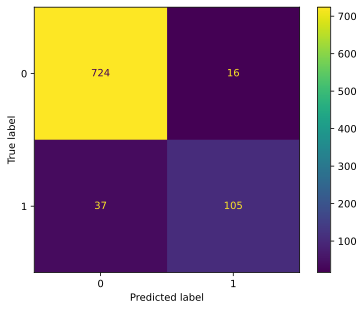

In [ ]:
# Matriz de confusion
cm = confusion_matrix(y_test, y_test_pred_xgboost, labels=xgb_regression.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_regression.classes_)
disp.plot()
plt.show()

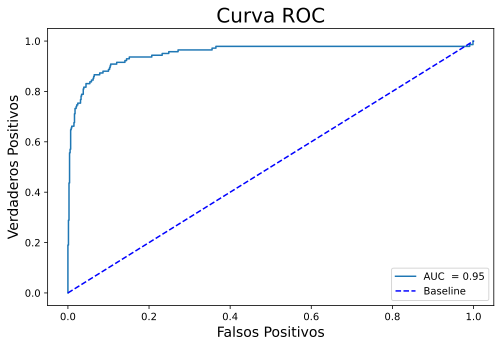

In [ ]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = xgb_regression.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

Esta curva de ROC es bastante similar a la del anterior modelo de boosting, pero en este caso, los falsos positivos no llegan hasta el 50% de los verdaderos positivos, lo cual es una mejora con respecto al anterior.

## 6.4 Análisis de resultados

Ahora vamos a comparar los resultados de los 3 modelos y ver cual de ellos es el mejor.
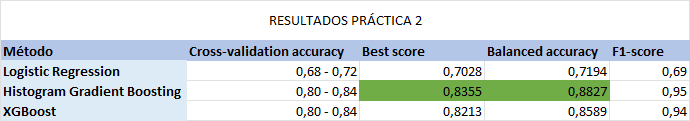

* Analizando los resultados de los tres modelos podemos ver que el Logistic Regression, al ser el modelo base, era esperable que fuese el que menos precisión tuvises y ha sido así.
* Con respecto a los modelos con boosting tienen valores muy parecidos, pero se ve que el Histogram Gradient Boosting obtiene mejores valores en Best score y Balanced Accuracy por lo que podemos concluir que es el mejor modelo de los evaluados.
* A pesar de las mejoras que se obtienen con el XGBoost en el classification report y la curva de ROC, vamos a continuar con el Gradient Boosting, ya que se tienen mejores valores de Balanced Accuracy que es el parámetro más importante a la hora de comparar de entro todos los que estamos evaluando.

# 7. SELECCIÓN DE ATRIBUTOS MEDIANTE FILTRADO

In [ ]:
cat_transformer_filter = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)), 
    ('pca', PCA(n_components=6)) 
])

num_transformer_filter = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=2)),
    ('scaler', RobustScaler())
])

preprocessor_filter = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_cols),
        ('num', num_transformer, num_cols)
        
    ])

preprocessor_filter

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('pca', PCA(n_components=5))]),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')),
                                ('num',
                                 Pipeline(steps=[('im...
                                 Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object'))])

In [ ]:
clf_gradient_boosting_filter = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('filter', SelectKBest()),
                                       ('classifier', HistGradientBoostingClassifier(class_weight='balanced', learning_rate =  0.25, max_leaf_nodes = 30, max_depth = 10, l2_regularization=1, random_state = 29))
                                      ])
clf_gradient_boosting_filter

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='objec...
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object'))])),
                ('filter', SelectKBest()),
                ('classifier',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                l2_regularization=1,
                                                learning_rate=0.25,
                                                max_depth=10, max_leaf_nodes=30,
                                                random_state=29))])

In [ ]:
scores_filter = cross_val_score(clf_gradient_boosting_filter, X_train, y_train, scoring='balanced_accuracy', cv = 5)
print(f"Todos los balanced_accuracy son:: {scores_filter}") 
print(f"Y el promedio de la accuracy de validación cruzada es: {scores_filter.mean():.2f} +- {scores_filter.std():.2f}")

Todos los balanced_accuracy son:: [0.78470247 0.77475996 0.82502074 0.77763992 0.77878707]
Y el promedio de la accuracy de validación cruzada es: 0.79 +- 0.02


In [ ]:
params_gradient_boosting_filter = {'filter__k': [1,2,3,4,5,6,7,8,9,10],
               'filter__score_func': [f_classif,mutual_info_classif,chi2]
}

In [ ]:
gradient_boosting_regression_filter = RandomizedSearchCV(clf_gradient_boosting_filter,
                                     param_distributions = params_gradient_boosting_filter,
                                     random_state = 29,
                                     scoring ='balanced_accuracy',
                                     cv = 5,
                                     refit = True,
                                     n_jobs = -1,
                                     verbose = 1,
                                     n_iter = 150,
                                     return_train_score = True)

gradient_boosting_regression_filter.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False)),
                                                                                               ('pca',
                                                                                                PCA(n_components=5))]),
                                                                               Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'Mar...
                                                                             max_leaf_nodes=30,
                                                                             random_state=29))]),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'filter__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'filter__score_func': [<function f_classif at 0x7f1cdaf60670>,
                                                               <function mutual_info_classif at 0x7f1cdaf63400>,
                                                               <scipy.stats._continuous_distns.chi2_gen object at 0x7f1cdd29b1f0>]},
                   random_state=29, return_train_score=True,
                   scoring='balanced_accuracy', verbose=1)

In [ ]:
gradient_boosting_regression_filter.best_score_

0.7929105019528974

In [ ]:
gradient_boosting_regression_filter.best_params_

{'filter__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'filter__k': 9}

In [ ]:
variables_filter = gradient_boosting_regression_filter.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
print(variables_filter)

['cat__pca0' 'cat__pca1' 'cat__pca2' 'cat__pca3' 'cat__pca4' 'num__hrs'
 'num__absences' 'num__JobInvolvement' 'num__PerformanceRating'
 'num__EnvironmentSatisfaction' 'num__JobSatisfaction'
 'num__WorkLifeBalance' 'num__Age' 'num__DistanceFromHome'
 'num__Education' 'num__EmployeeCount' 'num__JobLevel'
 'num__MonthlyIncome' 'num__NumCompaniesWorked' 'num__PercentSalaryHike'
 'num__StandardHours' 'num__StockOptionLevel' 'num__TotalWorkingYears'
 'num__TrainingTimesLastYear' 'num__YearsAtCompany'
 'num__YearsSinceLastPromotion' 'num__YearsWithCurrManager']


Estas son las variables que usará este modelo para clasificar. 
Vemos que ha eliminado variables que considera poco relevantes y vamos a ver que resultados consigue este modelo.

In [ ]:
gradient_boosting_regression_filter_pred = gradient_boosting_regression_filter.predict(X_test)
print(gradient_boosting_regression_filter_pred[:15])

print(classification_report(y_test, gradient_boosting_regression_filter_pred))

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       740
           1       0.71      0.75      0.73       142

    accuracy                           0.91       882
   macro avg       0.83      0.84      0.84       882
weighted avg       0.91      0.91      0.91       882



Como vemos aquí alcanza una precisión del 91%, inferior a los otros modelos que usan tadas las variables.

In [ ]:
print(f"El valor de balanced accuracy: {balanced_accuracy_score(y_test, gradient_boosting_regression_filter_pred)}")

El valor de balanced accuracy: 0.8435097068899886


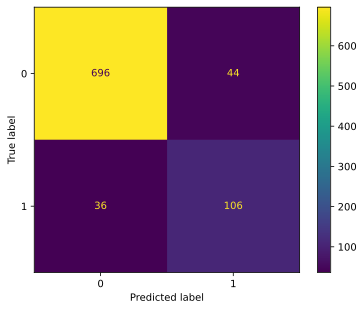

In [ ]:
cm = confusion_matrix(y_test, gradient_boosting_regression_filter_pred, labels=gradient_boosting_regression_filter.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gradient_boosting_regression_filter.classes_)
disp.plot()
plt.show()

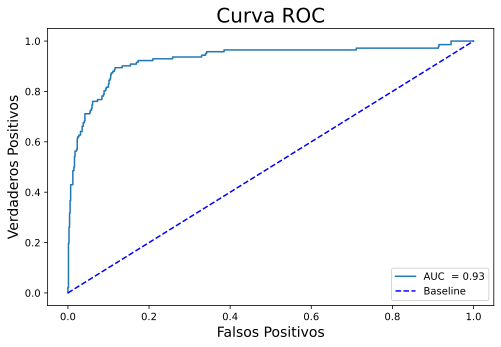

In [ ]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)
probs = gradient_boosting_regression_filter.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

# 9. Análisis final de resultados

Ahora vamos a comparar los resultados de los 3 modelos iniciales con el de selección de atributos mediante filtrado.
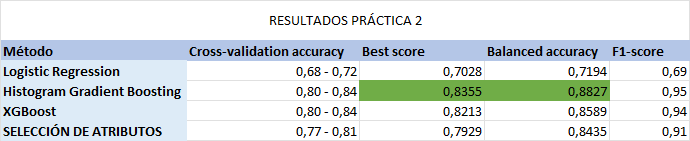

Podemos ver que el filtrado no ha producido ninguna mejora sobre los modelos con boosting, es decir a la hora de eliminar variables no se ha obtenido ninguna mejora, por ello el mejor modelo seguirá siendo el de Gradient Boosting.

# 8. MODELO FINAL

In [ ]:
modelo_final = gradient_boosting_regression.best_estimator_
modelo_final.fit(X,y)
joblib.dump(modelo_final, 'modelo_final.pkl')

['modelo_final.pkl']